## Imports

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Assignment

### Pre-processing

In [ ]:
# Takes a long time; only run once
LOAD_DATA_MODE = {0: "DER", 1: "PRI", 2: "ALL"} # Allows us to switch between DER/PLI values or all
y, x = load_data(train=True, mode = LOAD_DATA_MODE[0]) # Load data (DER)
y_indexes, x_test = load_data(train=False, mode = LOAD_DATA_MODE[0])

In [ ]:
x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8, np.random.seed()) # TODO TEST OTHER PERCENTAGES
x_tr = replace_min_999_by_col_mean(x_tr) # Handle invalid values
x_te = replace_min_999_by_col_mean(x_te)

x_tr = build_poly_2(x_tr) # Poly exp deg=2
x_te = build_poly_2(x_te)

x_tr, mean_x_tr, std_x_tr = standardize(x_tr) # Standardize x
x_te, mean_x_te, std_x_te = standardize(x_te)

tx_tr = add_x_bias(x_tr) # Add bias after normalisation to avoid NaNs
tx_te = add_x_bias(x_te)

In [23]:
print(tx_tr.shape)
print(tx_te.shape)

(200000, 105)
(50000, 105)


### Linear regression using gradient descent

In [10]:
# We run GD step times per epoch, for epochs epochs (same as running GD for epochs*step just lets us print intermediate results)
w_GD, epochs, step, gamma = np.zeros(105), 100, 150, 1e-4
loss_tr_GD = []
loss_te_GD = []
for i in range((int)(epochs)):
    w_GD, loss_tr = mean_squared_error_gd(y_tr, tx_tr, w_GD, step, gamma)
    loss_te = compute_mse(y_te, tx_te, w_GD)
    loss_tr_GD.append(loss_tr)
    loss_te_GD.append(loss_te)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

Epoch 0 : Training loss: 0.16198513147132218 Test loss: 0.16131704059278204
Epoch 1 : Training loss: 0.1557542572458944 Test loss: 0.15512474665220757
Epoch 2 : Training loss: 0.15132631140540573 Test loss: 0.15073131181663946
Epoch 3 : Training loss: 0.1479359958623637 Test loss: 0.14736981918649925
Epoch 4 : Training loss: 0.14517105011388143 Test loss: 0.14462808769179147
Epoch 5 : Training loss: 0.14280293470006572 Test loss: 0.14227826415545902
Epoch 6 : Training loss: 0.14070078645227693 Test loss: 0.14019030819173905
Epoch 7 : Training loss: 0.13878697046815056 Test loss: 0.1382873579282986
Epoch 8 : Training loss: 0.1370136722117069 Test loss: 0.13652226176595683
Epoch 9 : Training loss: 0.13535029302714507 Test loss: 0.1348649662965205
Epoch 10 : Training loss: 0.1337764918638858 Test loss: 0.13329557012976836
Epoch 11 : Training loss: 0.13227823856869975 Test loss: 0.13180039465001014
Epoch 12 : Training loss: 0.13084551053561358 Test loss: 0.13036969772279863
Epoch 13 : Trai

#### Plotting the resulting losses

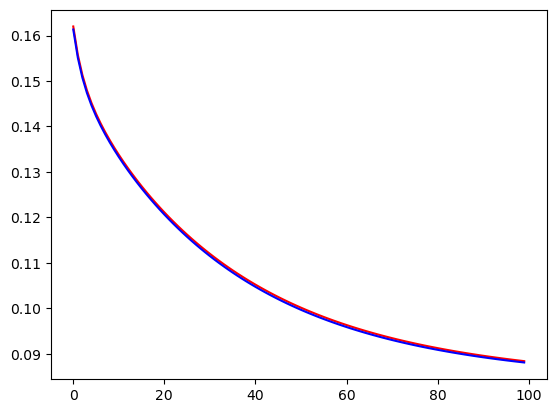

In [11]:
plt.plot(range(len(loss_tr_GD)), loss_tr_GD, c='red')
plt.plot(range(len(loss_te_GD)), loss_te_GD, c='blue')

#### Calculating the accuracy on the test set (with predictions = -1 or 1)

In [17]:
for thres_value in range(370,390,1):
    accuracy = compute_accuracy(tx_te, y_te, w_GD, 0.001*thres_value)
    print(f"Accuracy for these w: {accuracy*100}% threshold of {0.001*thres_value}")

Accuracy for these w: 74.668% threshold of 0.37
Accuracy for these w: 74.64999999999999% threshold of 0.371
Accuracy for these w: 74.666% threshold of 0.372
Accuracy for these w: 74.666% threshold of 0.373
Accuracy for these w: 74.688% threshold of 0.374
Accuracy for these w: 74.71799999999999% threshold of 0.375
Accuracy for these w: 74.724% threshold of 0.376
Accuracy for these w: 74.738% threshold of 0.377
Accuracy for these w: 74.74799999999999% threshold of 0.378
Accuracy for these w: 74.73% threshold of 0.379
Accuracy for these w: 74.76% threshold of 0.38
Accuracy for these w: 74.75% threshold of 0.381
Accuracy for these w: 74.72% threshold of 0.382
Accuracy for these w: 74.734% threshold of 0.383
Accuracy for these w: 74.728% threshold of 0.384
Accuracy for these w: 74.75% threshold of 0.385
Accuracy for these w: 74.738% threshold of 0.386
Accuracy for these w: 74.726% threshold of 0.387
Accuracy for these w: 74.72% threshold of 0.388
Accuracy for these w: 74.698% threshold of 0

best threshold= 0.38038038038038036 
best accruacy= 0.7476


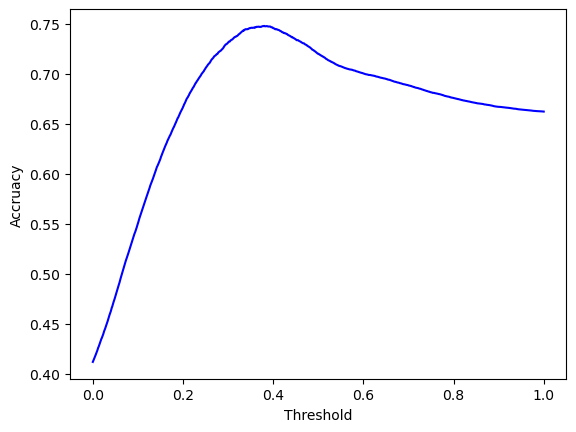

In [20]:
best_threshold, best_accruacy = threshold_selection_and_plot(tx_te, y_te, w_GD) # TODO TESTING OTHER THRESHOLD VALUES
print("best threshold=", best_threshold,"\nbest accruacy=",best_accruacy)

#### Saving for a submission

In [22]:
x_test_GD = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test_GD = build_poly_2(x_test_GD) # Build polynomial expansion

x_test_GD, mean_x_test_GD, std_x_test_GD = standardize(x_test_GD) # Standardize x

tx_test_GD = add_x_bias(x_test_GD)

y_hat = build_prediction(tx_test_GD, w_GD, 0.38, True) # TODO MODIFY THRESHOLD
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv") # Accuracy 0.745 F1 0.573

### Linear regression using stochastic gradient descent

In [24]:
w_SGD, epochs, step, gamma = np.zeros(105), 100, 150, 1e-4
for i in range((int)(epochs)):
    w_SGD, loss_tr = mean_squared_error_sgd(y_tr, tx_tr, w_SGD, step, gamma)
    loss_te = compute_mse(y_te, tx_te, w_SGD)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

Epoch 0 : Training loss: 0.162140302417095 Test loss: 0.16144022089625365
Epoch 1 : Training loss: 0.156636416265027 Test loss: 0.15597023919769465
Epoch 2 : Training loss: 0.15231363322298452 Test loss: 0.15161766570753554
Epoch 3 : Training loss: 0.14923140458036796 Test loss: 0.14852743563933068
Epoch 4 : Training loss: 0.14602621946916092 Test loss: 0.14537449084190632
Epoch 5 : Training loss: 0.14463945522758223 Test loss: 0.14403387913614749
Epoch 6 : Training loss: 0.14211973977234632 Test loss: 0.14159808211421435
Epoch 7 : Training loss: 0.13957050238299454 Test loss: 0.13909508883601046
Epoch 8 : Training loss: 0.13753579982146136 Test loss: 0.13707798030954307
Epoch 9 : Training loss: 0.13606069389370792 Test loss: 0.1356537799805358
Epoch 10 : Training loss: 0.13415970362274326 Test loss: 0.1337137461598906
Epoch 11 : Training loss: 0.13225390753031968 Test loss: 0.131799275470346
Epoch 12 : Training loss: 0.13178424352538534 Test loss: 0.13132433091438414
Epoch 13 : Traini

#### Calculating the accuracy on the test set (with predictions = 0 or 1)

best threshold= 0.3783783783783784 
best accruacy= 0.75502


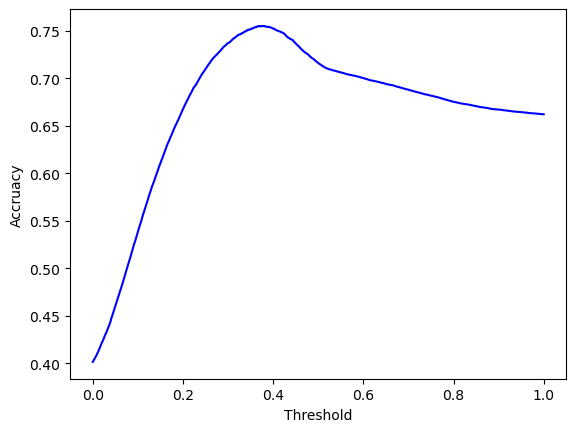

In [27]:
best_threshold, best_accruacy = threshold_selection_and_plot(tx_te, y_te, w_SGD) # TODO TESTING OTHER THRESHOLD VALUES
print("best threshold=", best_threshold,"\nbest accruacy=",best_accruacy)

#### Saving for a submission

In [28]:
x_test_SGD = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test_SGD = build_poly_2(x_test_SGD) # Build polynomial expansion

x_test_SGD, mean_x_test_SGD, std_x_test_SGD = standardize(x_test_SGD) # Standardize x

tx_test_SGD = add_x_bias(x_test_SGD)

y_hat = build_prediction(tx_test_SGD, w_SGD, 0.3783, True) # TODO MODIFY THRESHOLD
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv") # Accuracy 0.753 F1 0.598

### Least squares

In [29]:
w_LS, loss_tr = least_squares(y_tr, tx_tr)
loss_te = compute_mse(y_te, tx_te, w_LS)
print(f"Training loss: {loss_tr}\nTest loss: {loss_te}")

Training loss: 0.07825013152311074
Test loss: 0.08396616298950829


best threshold= 0.48648648648648646 
best accruacy= 0.77346


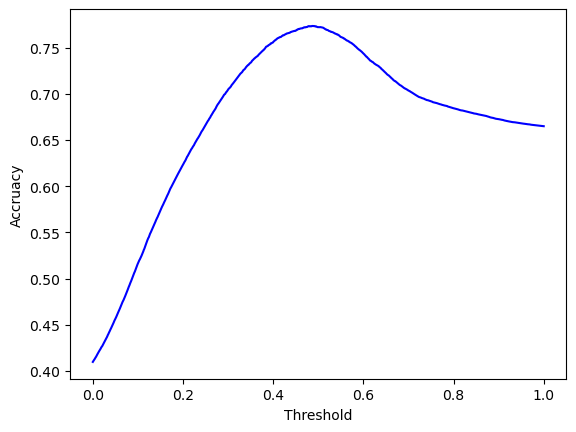

In [31]:
best_threshold, best_accruacy = threshold_selection_and_plot(tx_te, y_te, w_LS)
print("best threshold=", best_threshold,"\nbest accruacy=",best_accruacy)

#### Saving for a submission

In [32]:
x_test_LS = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test_LS = build_poly_2(x_test_LS) # Build polynomial expansion

x_test_LS, mean_x_test_LS, std_x_test_LS = standardize(x_test_LS) # Standardize x

tx_test_LS = add_x_bias(x_test_LS)

y_hat = build_prediction(tx_test_LS, w_LS, 0.3783, True) # TODO MODIFY THRESHOLD
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv") # Accuracy 0.748 F1 0.684

### Ridge regression

In [42]:
lambda_ = 0.00233
w_REG, loss_tr = ridge_regression(y_tr, tx_tr, lambda_)
print(f"Training loss: {loss_tr}\n")

Training loss: 0.07853582788447432



In [46]:
# (very) Long running
ridge_lambdas_and_threshold (y_tr, tx_tr, y_te, tx_te)

lambda= 0.002335721469090121 best threshold= 0.4854854854854855 accruacy= 0.77998


#### Saving for a submission

In [48]:
x_test_REG = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test_REG = build_poly_2(x_test_REG) # Build polynomial expansion

x_test_REG, mean_x_test_REG, std_x_test_REG = standardize(x_test_REG) # Standardize x

tx_test_REG = add_x_bias(x_test_REG)

y_hat = build_prediction(tx_test_REG, w_REG, 0.4854, True) # TODO MODIFY THRESHOLD
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv") # Accuracy 0.778 F1 0.654

### Logistic regression using gradient descent or SGD (y ∈ {0, 1})

In [50]:
# We run GD step times per epoch, for epochs epochs (same as running GD for epochs*step just lets us print intermediate results)
w_GD_log, epochs, step, gamma = np.zeros(105), 100, 150, 1e-1
loss_tr_GD_log = []
loss_te_GD_log = []
for i in range((int)(epochs)):
    w_GD_log, loss_tr = logistic_regression(y_tr, tx_tr, w_GD_log, step, gamma)
    loss_te = compute_log_loss(y_te, tx_te, w_GD_log)
    loss_tr_GD_log.append(loss_tr)
    loss_te_GD_log.append(loss_te)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

Epoch 0 : Training loss: 0.49628863762309705 Test loss: 0.4948863083318516
Epoch 1 : Training loss: 0.4832279746705189 Test loss: 0.4831179992058458
Epoch 2 : Training loss: 0.4758005729989096 Test loss: 0.4764821166129349
Epoch 3 : Training loss: 0.47065114908773586 Test loss: 0.4718515162444593
Epoch 4 : Training loss: 0.4667909211440509 Test loss: 0.4683249848623757
Epoch 5 : Training loss: 0.463743617986957 Test loss: 0.465489088188846
Epoch 6 : Training loss: 0.46124482183177684 Test loss: 0.4631274848085494
Epoch 7 : Training loss: 0.459137950316132 Test loss: 0.4611107877162233
Epoch 8 : Training loss: 0.4573247082674326 Test loss: 0.45935641869011656
Epoch 9 : Training loss: 0.45573972595924966 Test loss: 0.45780865437568175
Epoch 10 : Training loss: 0.45433719281369833 Test loss: 0.4564278797273577
Epoch 11 : Training loss: 0.4530836571133769 Test loss: 0.4551847932957239
Epoch 12 : Training loss: 0.4519539674133029 Test loss: 0.4540571680442036
Epoch 13 : Training loss: 0.450

#### Plotting the resulting losses

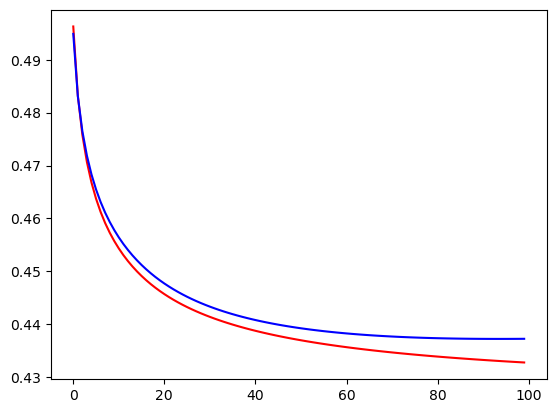

In [51]:
plt.plot(range(len(loss_tr_GD_log)), loss_tr_GD_log, c='red')
plt.plot(range(len(loss_te_GD_log)), loss_te_GD_log, c='blue')

#### Calculating the accuracy on the test set (with predictions = -1 or 1)

best threshold= 0.4974974974974975 
best accruacy= 0.80462


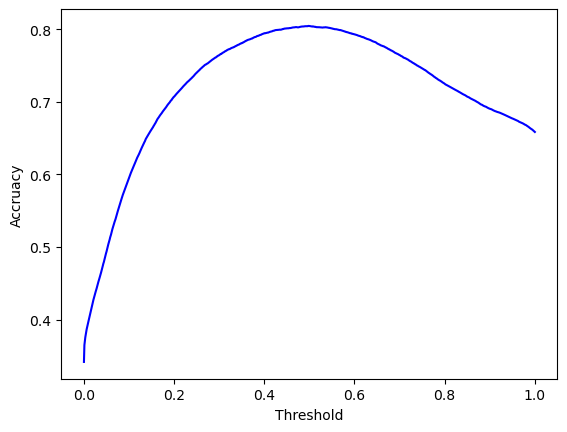

In [56]:
best_threshold, best_accruacy = threshold_selection_and_plot_log(tx_te, y_te, w_GD_log)
print("best threshold=", best_threshold,"\nbest accruacy=",best_accruacy)

In [57]:
x_test_log = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test_log = build_poly_2(x_test_log)

x_test_log, mean_x_test_log, std_x_test_log = standardize(x_test_log) # Standardize x

tx_test_log = add_x_bias(x_test_log)

y_hat = build_prediction_log(tx_test_log, w_GD_log, threshold=0.4974, minus_one = True)
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv") #TODO submit this friday 10:22pm

### Regularized logistic regression using gradient descent or SGD (y ∈ {0, 1}, with regularization term λ∥w∥**2)

In [63]:
# We run GD step times per epoch, for epochs epochs (same as running GD for epochs*step just lets us print intermediate results)
lambda_reg = 1e-3
w_GD_reg_log, epochs, step, gamma = np.zeros(105), 50, 150, 1e-1
loss_tr_GD_reg_log = []
loss_te_GD_reg_log = []
for i in range((int)(epochs)):
    w_GD_reg_log, loss_tr = reg_logistic_regression(y_tr, tx_tr, lambda_reg, w_GD_reg_log, step, gamma)
    loss_te = compute_log_loss(y_te, tx_te, w_GD_reg_log)
    loss_tr_GD_reg_log.append(loss_tr)
    loss_tr_GD_reg_log.append(loss_te)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

Epoch 0 : Training loss: 0.49670594737045404 Test loss: 0.495302661388486
Epoch 1 : Training loss: 0.48397389886670394 Test loss: 0.48380990754456443
Epoch 2 : Training loss: 0.47691375379238193 Test loss: 0.4774851871108216
Epoch 3 : Training loss: 0.4721258920981713 Test loss: 0.4731626181904356
Epoch 4 : Training loss: 0.46860711042706277 Test loss: 0.4699387680214751
Epoch 5 : Training loss: 0.46588507537419693 Test loss: 0.467398696820617
Epoch 6 : Training loss: 0.46370012136251565 Test loss: 0.46532649450113694
Epoch 7 : Training loss: 0.4618979483371521 Test loss: 0.4635940088926403
Epoch 8 : Training loss: 0.46038099562493673 Test loss: 0.4621189376343594
Epoch 9 : Training loss: 0.459084079308468 Test loss: 0.46084540923150186
Epoch 10 : Training loss: 0.45796156771749597 Test loss: 0.45973376273599936
Epoch 11 : Training loss: 0.4569802966517481 Test loss: 0.4587548461127344
Epoch 12 : Training loss: 0.45611543185249614 Test loss: 0.45788662925703993
Epoch 13 : Training loss

best threshold= 0.4894894894894895 
best accruacy= 0.79592


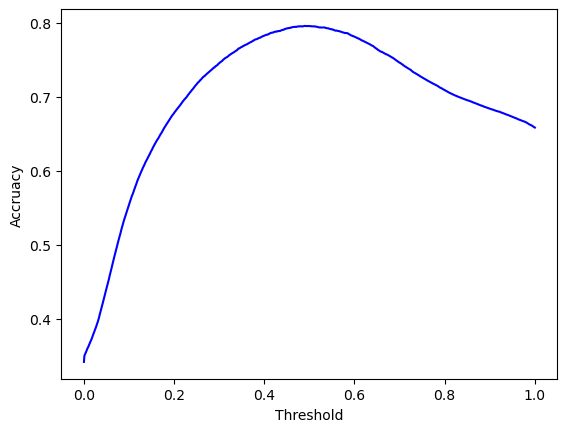

In [64]:
best_threshold, best_accruacy = threshold_selection_and_plot_log(tx_te, y_te, w_GD_reg_log)
print("best threshold=", best_threshold,"\nbest accruacy=",best_accruacy)